Load in Data


In [1]:
import pandas as pd
import numpy as np
DATA_PATH = '/Users/tawate/Documents/Competition Code/Data/Calorie_Predictor/'
df = pd.read_csv(DATA_PATH + 'train.csv')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def display_dataframe_info(df):
    """
    Displays concise summary of a DataFrame, including data types and non-null values.
    """
    print("DataFrame Info:")
    df.info()
    print("\n")

def display_dataframe_head(df, n=5):
    """
    Displays the first n rows of the DataFrame.
    """
    print(f"DataFrame Head (first {n} rows):")
    print(df.head(n))
    print("\n")

def display_dataframe_tail(df, n=5):
    """
    Displays the last n rows of the DataFrame.
    """
    print(f"DataFrame Tail (last {n} rows):")
    print(df.tail(n))
    print("\n")

def display_missing_values(df):
    """
    Displays the count and percentage of missing values for each column.
    """
    print("Missing Values:")
    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages
    })
    print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))
    print("\n")

def display_descriptive_statistics(df):
    """
    Displays descriptive statistics for numerical columns.
    """
    print("Descriptive Statistics for Numerical Columns:")
    print(df.describe())
    print("\n")
    
display_dataframe_head(df)
display_descriptive_statistics(df)
display_missing_values(df)
display_dataframe_tail(df, n=5)
display_dataframe_info(df)


DataFrame Head (first 5 rows):
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0


Descriptive Statistics for Numerical Columns:
                  id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000    

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, column_name, bins=30, kde=True, title=None, xlabel=None, ylabel='Frequency'):
    """
    Generates a nice looking histogram for a numeric input variable from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the numeric column to plot.
    - bins (int): Number of bins for the histogram.
    - kde (bool): Whether to plot a Gaussian kernel density estimate.
    - title (str): Title of the plot. If None, a default title will be generated.
    - xlabel (str): Label for the x-axis. If None, the column_name will be used.
    - ylabel (str): Label for the y-axis.

    Returns:
    - matplotlib.axes._subplots.AxesSubplot: The axes object of the plot.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        raise TypeError(f"Column '{column_name}' is not numeric.")

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bins, kde=kde)

    if title is None:
        title = f'Distribution of {column_name}'
    plt.title(title, fontsize=16)

    if xlabel is None:
        xlabel = column_name
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    return plt.gca()


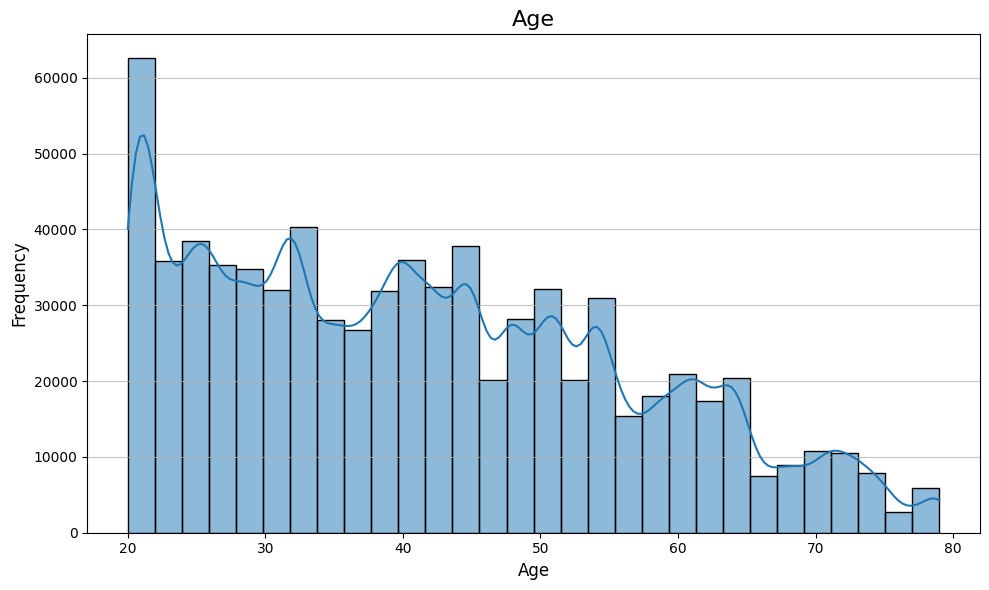

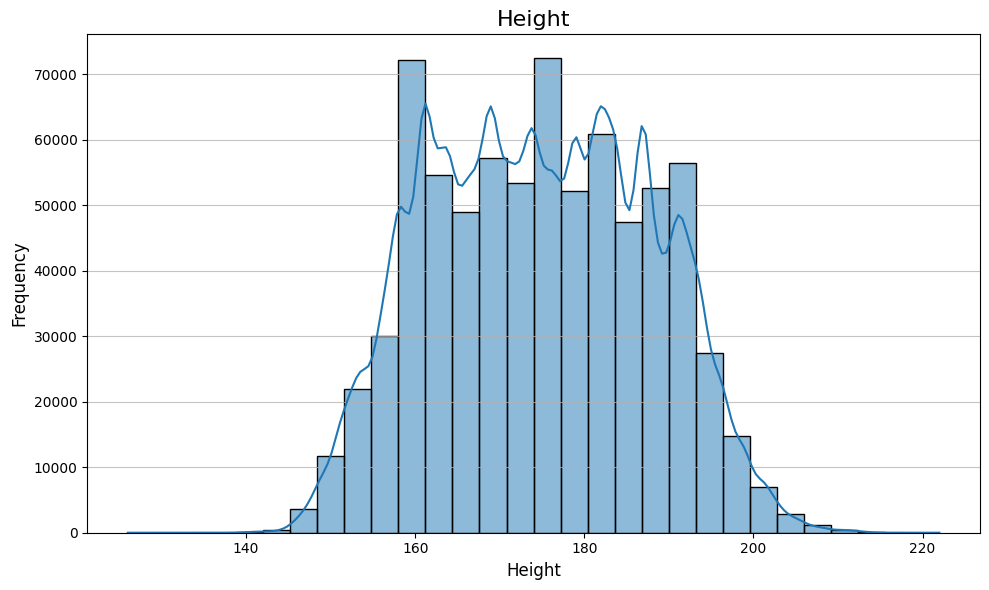

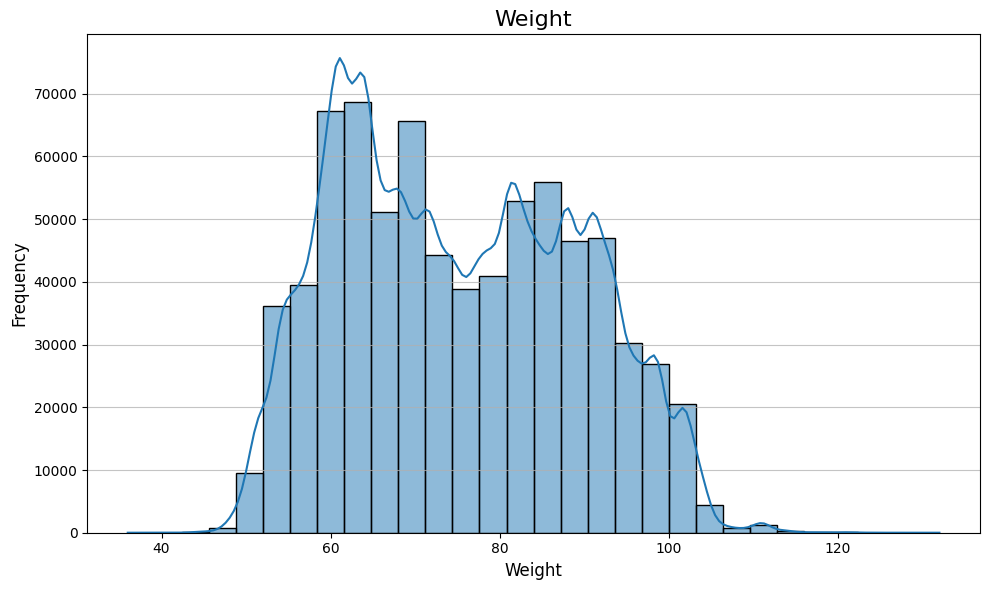

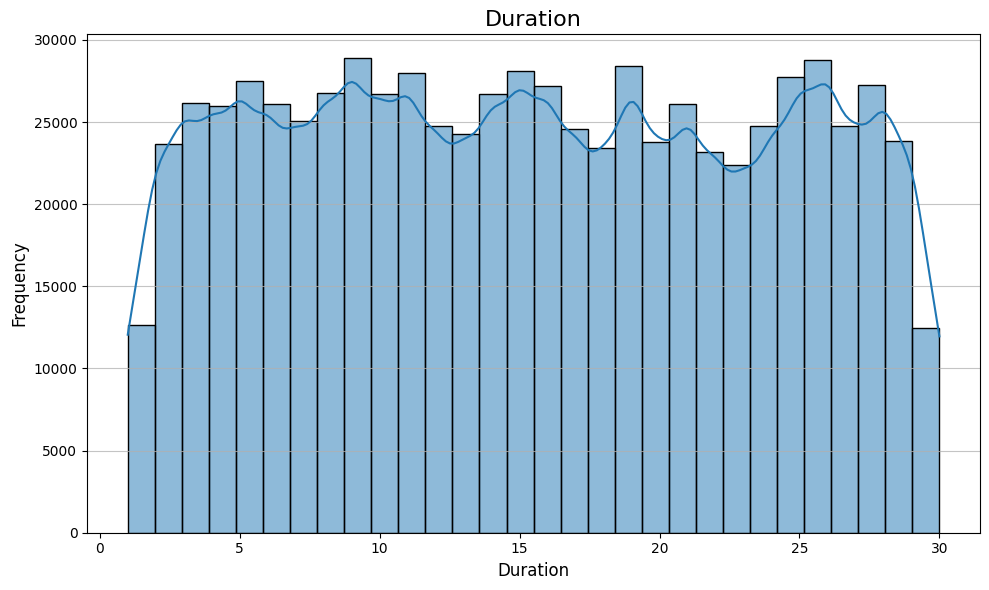

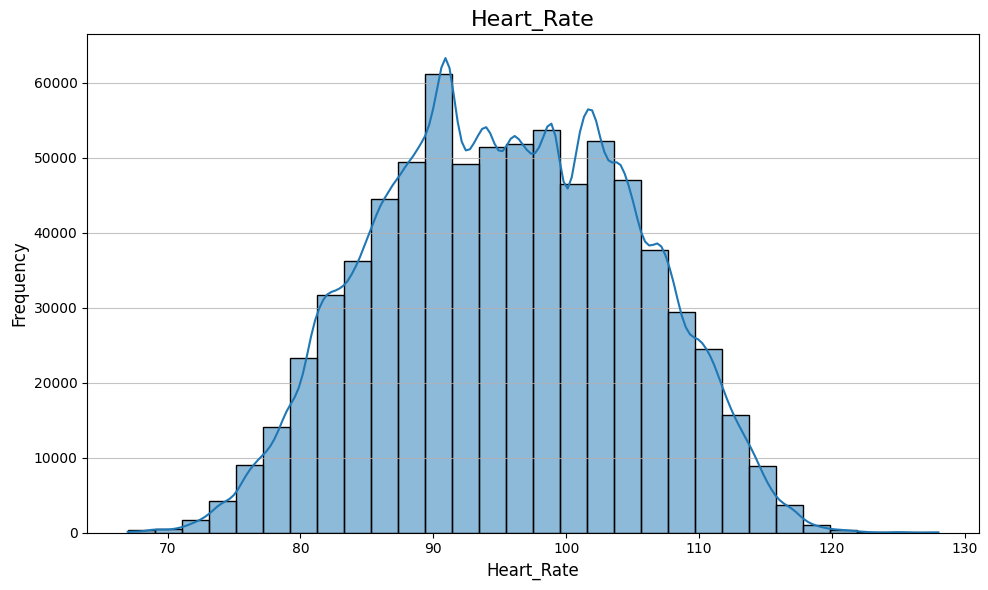

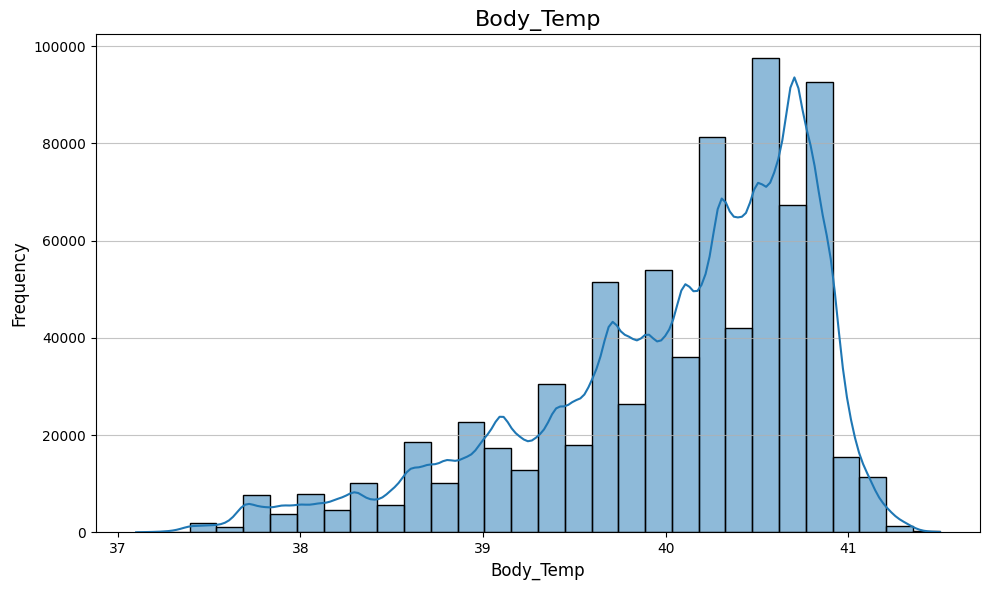

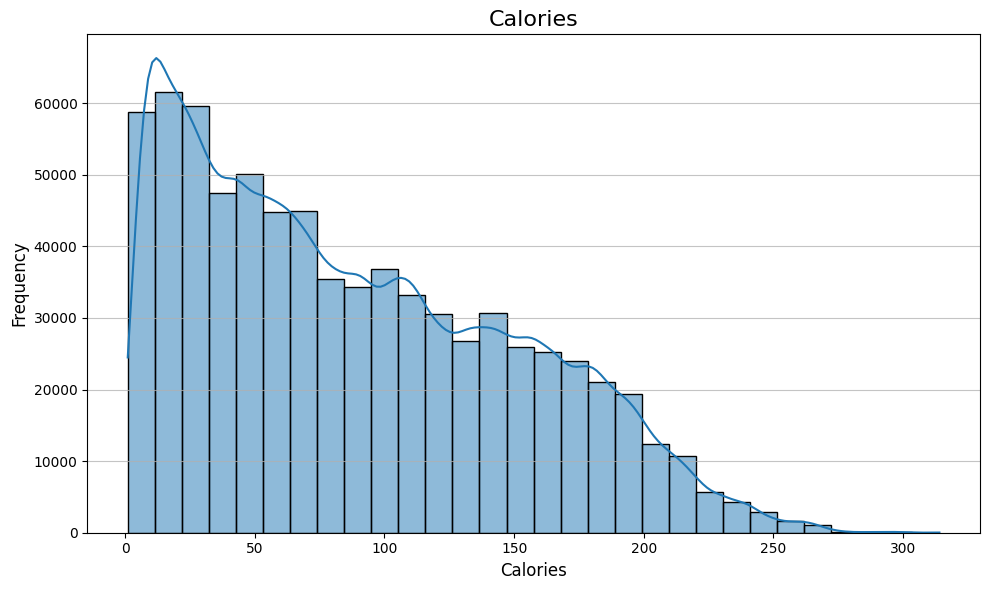

In [ ]:
# Print each Distribution Chart
cols = df.columns.tolist()
for col in cols:
    if col != "id" and pd.api.types.is_numeric_dtype(df[col]) == True:
        plot_histogram(df, col, title=col)

Categorical Variable Encoding

In [6]:
from sklearn.model_selection import train_test_split
# OneHot Encoding Categorical Vars
train_df_prep = pd.get_dummies(df, columns=['Sex']).drop(columns=['Sex_female'])
train_df_prep['Sex_male'] = train_df_prep['Sex_male'].astype(int)

# Split Training Data in Train/Validation
X = train_df_prep.drop(columns=['Calories','id'])
y = train_df_prep['Calories']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)
print(df['Sex'].nunique())

2


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Train Gradient Boosting Regressor
gbr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = gbr.predict(X_test)

# Evaluate the model
print("Model Performance:")
print("--------------------------------------")
print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))

TypeError: GradientBoostingRegressor.__init__() takes 1 positional argument but 2 were given